<a href="https://colab.research.google.com/github/ennovak/AI-Detection-LLM/blob/main/Emily_Novak_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Notebook is written by Emily Novak for Project 2 of the course Intro to LLMs**

> In this notebook I will perform text preprocessing and vectorization on a provided dataset of human and AI-written essays. I will create 3 different word embeddings and test each one on 3 separate deep learning models, and perform hyperparameter tuning on each model. I will then evaluate each model's performance and save the models for streamlit deployment.

You can find all of the files for the full project on my GitHub: https://github.com/ennovak/AI-Detection-LLM

# **1. Import Necessary Libraries**

In [1]:
# uncomment for initial run
!pip install gensim
!pip install torchviz
!pip install keras_tuner

  Using cached torchviz-0.0.3-py3-none-any.whl.metadata (2.1 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manyl

In [2]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import joblib
import string
import math
import time
from bs4 import BeautifulSoup
from collections import Counter, defaultdict
import networkx as nx
from scipy.spatial.distance import pdist, squareform
from gensim.models import Word2Vec
import gensim

# Sklearn libraries for machine learning and text processing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, cross_validate, validation_curve, learning_curve
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances


# NLTK libraries for text processing (lemmatization, stemming, stopwords, POS tagging)
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import ne_chunk, pos_tag
from nltk.tree import Tree


# Download necessary NLTK resources for text processing
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4')  # Open Multilingual Wordnet
nltk.download('punkt')  # Tokenizer
nltk.download('punkt_tab')
nltk.download('stopwords')  # Stopwords for text cleaning
nltk.download('averaged_perceptron_tagger')  # POS tagger for part-of-speech tagging
nltk.download('averaged_perceptron_tagger_eng')  # Additional tagger
nltk.download('tagsets_json')  # Tagset resource

print("\n All libraries imported successfully!")


# Deep Learning Libraries
from keras.layers import Dropout, Dense, GRU, Embedding, SimpleRNN, LSTM, Bidirectional, TimeDistributed, Flatten, MaxPooling1D
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Conv1D,Flatten,Embedding,MaxPool1D,concatenate,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping
from tensorflow.keras.optimizers import Adam

# PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from tqdm import tqdm


# Logging
import logging
logging.basicConfig(level=logging.INFO)



# Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.



 All libraries imported successfully!


## Checking/Setting Computation Device

Utilizing pyTorch support of GPU training of neural networks to speed up training process.

In [3]:
use_cuda = torch.cuda.is_available()

# Use this line below to enforce the use of the CPU (in case you don't have a supported GPU)
# use_cuda = False  # Uncomment this line to force CPU usage

device = torch.device("cuda:0" if use_cuda else "cpu")

print("Available device: {}".format(device))
print("If you see 'cuda:0', it means GPU is available and will be used")
print("If you see 'cpu', it means only CPU will be used")

Available device: cpu
If you see 'cuda:0', it means GPU is available and will be used
If you see 'cpu', it means only CPU will be used


# **2. Data Analysis and Preprocessing**

In [4]:
# Import Data
from google.colab import files
uploaded = files.upload()

Saving AI_vs_huam_train_dataset.xlsx to AI_vs_huam_train_dataset.xlsx
Saving Final_test_data.csv to Final_test_data.csv


In [5]:
# Read Data
df_train = pd.read_excel('AI_vs_huam_train_dataset.xlsx')
df_test = pd.read_csv('Final_test_data.csv')

In [6]:
print("Dataset Information:")
print(f"Training data shape: {df_train.shape}")
print(f"Test data shape: {df_test.shape}")
print(f"Columns: {df_train.columns.tolist()}")

# Show first few rows
print("\nFirst 5 rows of training data:")
print(df_train.head())

# Check sentiment distribution
print("\nLabel distribution:")
print(df_train['label'].value_counts())

Dataset Information:
Training data shape: (3728, 2)
Test data shape: (869, 2)
Columns: ['essay', 'label']

First 5 rows of training data:
                                               essay  label
0  International sports events require the most w...      0
1  Globalisation has become a significant aspect ...      0
2  There is an ever-increasing number of bullying...      0
3  It is commonly believed, that companies should...      0
4  Despite knowing about the adverse effects of c...      0

Label distribution:
label
0    1864
1    1864
Name: count, dtype: int64


## **Text Preprocessing**

Here, we want to "clean" the text data to include only words that provide value. We remove common stopwords and unwanted characters and digits. We do this to reduce the amount of data used in training so that we're not trying to process unnecessary data.

Once we have the cleaned text, we want to transform the text into numerical data that our classifiers can understand using vectors.

In [7]:
#  Advanced Text Preprocessing with Lemmatization

class TextPreprocessor:
    """
    Advanced text preprocessing class with lemmatization
    This will clean text better than basic preprocessing
    """

    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        # Add custom stop words
        self.stop_words.update(['u', 'ur', 'im', 'dont', 'doin', 'ure'])

    def get_wordnet_pos(self, word):
        """Convert POS tag to format accepted by WordNet lemmatizer"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    def clean_text(self, text):
        """Basic text cleaning"""
        if not isinstance(text, str):
            return ""

        # Convert to lowercase
        text = text.lower()

        # Remove URLs, emails, HTML tags
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        text = re.sub(r'\S+@\S+', '', text)
        text = re.sub(r'<.*?>', '', text)

        # Remove special characters but keep spaces
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove digits
        text = re.sub(r'\d', '', text)

        # Remove extra whitespace
        text = ' '.join(text.split())

        return text

    def lemmatize_text(self, text):
        """Apply lemmatization with POS tagging"""
        tokens = word_tokenize(text)

        lemmatized_tokens = []
        for token in tokens:
            if token not in self.stop_words and len(token) > 2:
                # Get POS tag and lemmatize
                pos_tag = self.get_wordnet_pos(token)
                lemmatized_token = self.lemmatizer.lemmatize(token, pos_tag)
                lemmatized_tokens.append(lemmatized_token)

        return ' '.join(lemmatized_tokens)

    def preprocess(self, text):
        """Complete preprocessing pipeline"""
        cleaned_text = self.clean_text(text)
        lemmatized_text = self.lemmatize_text(cleaned_text)
        return lemmatized_text

print("Text preprocessing class created!")

Text preprocessing class created!


In [8]:
# Apply Text Preprocessing to the "text" column

# Initialize the preprocessor
preprocessor = TextPreprocessor()

print("Applying advanced text preprocessing with lemmatization...")

# Apply preprocessing to training data
df_train['clean_essay'] = df_train['essay'].apply(preprocessor.preprocess)

# Apply preprocessing to test data
df_test['clean_essay'] = df_test['essay'].apply(preprocessor.preprocess)

print("Text preprocessing completed!")

Applying advanced text preprocessing with lemmatization...
Text preprocessing completed!


In [9]:
# Show examples of preprocessing
print("\nExamples of text preprocessing:")
print("Original:", df_train['essay'].iloc[0])
print("Processed:", df_train['clean_essay'].iloc[0])
print()
print("Original:", df_train['essay'].iloc[5])
print("Processed:", df_train['clean_essay'].iloc[5])


Examples of text preprocessing:
Original: International sports events require the most well-trained athletes for each country, in order to achieve this goal countries make an effort to build infrastructure designed to train top athletes. Although this policy can indeed make fewer sports facilities for ordinary people, investing in the best athletes is vital to develop competitive sports performances in each country.
On the one hand, building specific infrastructure for the best athletes is crucial in order to get better results at international sports events such as The Olympics or the World Cup. The importance of getting better results is that it creates awareness of the importance of sports in society and motivates more people to do a sport. In this way, investing in these developments can help countries to develop an integral sport policy that can benefit everyone.
On the other hand, one can argue that a negative effect could be that less infrastructure is built for the rest of the

In [10]:
# Show vocab before text cleaning
train_vocab = set(" ".join(df_train['essay']).split())
test_vocab = set(" ".join(df_test['essay']).split())

print("=== Vocabulary statistics before text cleaning ===")
print(f"Train unique words : {len(train_vocab):,}")
print(f"Test  unique words : {len(test_vocab):,}")

=== Vocabulary statistics before text cleaning ===
Train unique words : 42,702
Test  unique words : 16,261


In [11]:
# Show vocab after text cleaning
train_vocab = set(" ".join(df_train['clean_essay']).split())
test_vocab = set(" ".join(df_test['clean_essay']).split())

print("=== Vocabulary statistics before text cleaning ===")
print(f"Train unique words : {len(train_vocab):,}")
print(f"Test  unique words : {len(test_vocab):,}")

=== Vocabulary statistics before text cleaning ===
Train unique words : 21,269
Test  unique words : 8,829


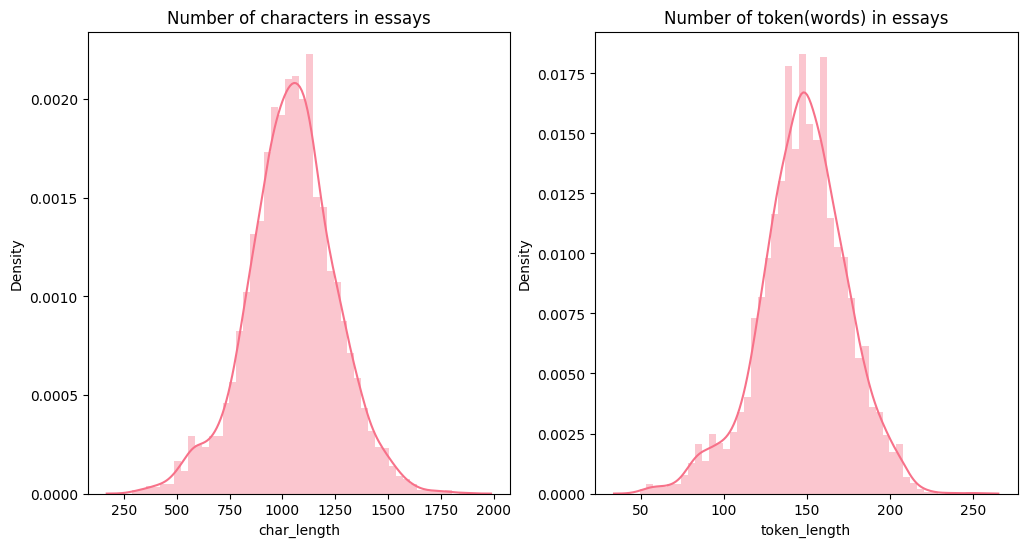

In [12]:
#Distribution of character length and token length in the training data

df_train['char_length'] = df_train['clean_essay'].apply(lambda x : len(x))
df_train['token_length'] = df_train['clean_essay'].apply(lambda x : len(x.split(" ")))

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(df_train['char_length'], ax=ax1)
sns.distplot(df_train['token_length'], ax=ax2)
ax1.set_title('Number of characters in essays')
ax2.set_title('Number of token(words) in essays')
plt.show()

In [13]:
# Define features and target
X = df_train['clean_essay']  # All text data
y = df_train['label']       # All labels

print(f"Total input text samples: {len(X)}")
print(f"Total labels: {len(y)}")

# Count labels
label_counts = np.bincount(y)
print(f"Label distribution: {label_counts}")
print(f"Number of 0s (class 0): {label_counts[0]:,}")
print(f"Number of 1s (class 1): {label_counts[1]:,}")

# Calculate percentages
total_samples = len(y)
percentage_0 = (label_counts[0] / total_samples) * 100
percentage_1 = (label_counts[1] / total_samples) * 100

print(f"Percentage of 0s: {percentage_0:.1f}%")
print(f"Percentage of 1s: {percentage_1:.1f}%")

print(f"\nFirst sample: {X.iloc[0][:100]}...")

Total input text samples: 3728
Total labels: 3728
Label distribution: [1864 1864]
Number of 0s (class 0): 1,864
Number of 1s (class 1): 1,864
Percentage of 0s: 50.0%
Percentage of 1s: 50.0%

First sample: international sport event require welltrained athlete country order achieve goal country make effort...


# **3. Create Training and Validation Data**

In [14]:
print("Applying train-test split on pre-processed text data...")

X_train, X_val, y_train, y_val = train_test_split(
    X,                    # preprocessed text data
    y,                    # Labels
    test_size=0.2,        # 20% for validation
    random_state=42,      # For reproducibility
    stratify=y            # Maintain label distribution
)

print(f"Train-test split completed:")
print(f"Training samples: {len(X_train):,}")
print(f"Validation samples: {len(X_val):,}")

Applying train-test split on pre-processed text data...
Train-test split completed:
Training samples: 2,982
Validation samples: 746


In [15]:
# Set random seed for reproducible results
np.random.seed(7)

#Tokenization (Fit ONLY on training data)
print("\n" + "="*60)
print("TOKENIZATION")
print("="*60)

print("Fitting tokenizer on training data only...")

# Initialize tokenizer
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')

# Fit tokenizer ONLY on training data
tokenizer.fit_on_texts(X_train)

print(f"\nTokenizer vocabulary size: {len(tokenizer.word_index):,}")

# Get word index (word to integer mapping)
word_index = tokenizer.word_index

print(f"Found {len(word_index)} unique tokens")

# Show most common words
print(f"\nMost frequent words:")
for i, (word, index) in enumerate(list(word_index.items())[:10]):
    print(f"  {i+1}. '{word}': index {index}")


TOKENIZATION
Fitting tokenizer on training data only...

Tokenizer vocabulary size: 18,742
Found 18742 unique tokens

Most frequent words:
  1. 'people': index 1
  2. 'new': index 2
  3. 'risk': index 3
  4. 'take': index 4
  5. 'thing': index 5
  6. 'try': index 6
  7. 'successful': index 7
  8. 'life': index 8
  9. 'success': index 9
  10. 'well': index 10


In [16]:
# Convert texts to sequences
print("Converting texts to sequences...")
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

print("Text to sequence conversion completed.")

Converting texts to sequences...
Text to sequence conversion completed.


In [17]:
# Check sequence lengths before padding
lengths = [len(seq) for seq in X_train_seq]
print(f"Average length: {np.mean(lengths):.1f}")
print(f"Max length: {max(lengths)}")
print(f"95th percentile: {np.percentile(lengths, 95):.1f}")

Average length: 148.2
Max length: 236
95th percentile: 191.0


In [18]:
print("To choose optimal sequence length, we need to analyze our text lengths.")

# Analyze sequence lengths in our dataset
text_lengths = [len(text.split()) for text in df_train['clean_essay']]

print("Our tweet text length statistics:")
print(f"Mean length: {np.mean(text_lengths):.1f} words")
print(f"Median length: {np.median(text_lengths):.1f} words")
print(f"90th percentile: {np.percentile(text_lengths, 90):.0f} words")
print(f"95th percentile: {np.percentile(text_lengths, 95):.0f} words")
print(f"99th percentile: {np.percentile(text_lengths, 99):.0f} words")

coverage_200 = np.mean(np.array(text_lengths) <= 200) * 100
coverage_215 = np.mean(np.array(text_lengths) <= 215) * 100
coverage_220 = np.mean(np.array(text_lengths) <= 220) * 100

# Check coverage with MAX_SEQUENCE_LENGTH
print(f"Coverage with length 200: {coverage_200:.1f}%")
print(f"Coverage with length 215: {coverage_215:.1f}%")
print(f"Coverage with length 220: {coverage_220:.1f}%")

print("\nRECOMMENDATIONS:")
print("="*50)

# Based on our actual data statistics
max_length = int(np.max(text_lengths))
mean_length = np.mean(text_lengths)
percentile_95 = np.percentile(text_lengths, 95)
percentile_99 = np.percentile(text_lengths, 99)

if percentile_99 <= 200:
    recommended = 215
    print(f"RECOMMENDED: MAX_SEQUENCE_LENGTH = {recommended}")
    print("   Effect: Perfect for our tweet data, excellent coverage with minimal padding")
elif percentile_99 <= 215:
    recommended = 220
    print(f"RECOMMENDED: MAX_SEQUENCE_LENGTH = {recommended}")
    print("   Effect: Optimal for our data, covers all tweets with small buffer")
elif percentile_99 <= 220:
    recommended = 230
    print(f"RECOMMENDED: MAX_SEQUENCE_LENGTH = {recommended}")
    print("   Effect: Safe choice, covers all tweets with reasonable buffer")
else:
    recommended = int(percentile_99) + 5
    print(f"RECOMMENDED: MAX_SEQUENCE_LENGTH = {recommended}")
    print("Effect: Covers 99% of tweets with small buffer")

print(f"\nAlternative options:")
if coverage_200 >= 95:
    print(f"• Length 200: Covers {coverage_200:.1f}% - Very fast training")
if coverage_215 >= 99:
    print(f"• Length 215: Covers {coverage_215:.1f}% - Excellent balance")
if coverage_220 == 100:
    print(f"• Length 220: Covers {coverage_220:.1f}% - Conservative choice")

To choose optimal sequence length, we need to analyze our text lengths.
Our tweet text length statistics:
Mean length: 147.8 words
Median length: 148.0 words
90th percentile: 181 words
95th percentile: 191 words
99th percentile: 207 words
Coverage with length 200: 98.0%
Coverage with length 215: 99.8%
Coverage with length 220: 99.9%

RECOMMENDATIONS:
RECOMMENDED: MAX_SEQUENCE_LENGTH = 220
   Effect: Optimal for our data, covers all tweets with small buffer

Alternative options:
• Length 200: Covers 98.0% - Very fast training
• Length 215: Covers 99.8% - Excellent balance


In [19]:
#Padding
print("\n" + "="*60)
print("PADDING SEQUENCES")
print("="*60)

print("Applying padding to sequences...")

# Pad sequences, we set 220 the Maximum length for each sequence
X_train_padded = pad_sequences(X_train_seq, maxlen=220, padding="post")  # padding = "post" adds zeros at the end
X_val_padded = pad_sequences(X_val_seq, maxlen=220, padding='post')

print(f"Padding completed:")
print(f"Training data shape: {X_train_padded.shape}")
print(f"Validation data shape: {X_val_padded.shape}")


PADDING SEQUENCES
Applying padding to sequences...
Padding completed:
Training data shape: (2982, 220)
Validation data shape: (746, 220)


In [20]:
print(f"added sequence (first 3 sentences): {X_train_padded[1:4][:220]}")

added sequence (first 3 sentences): [[ 307   56    8    1  217  600 1370   32 3220   21   37    4    3 6018
   322   48   15 2096  466  133 8280  121   11   35   49 1109  112   73
    56    8  413    1  117   84   58   15   85  307  176   56  659  193
    11   32   12  524  699   37    4    3    6   75    2    5  652   54
   242  695  532  362   60   15   61 1434  814   54 1434  982   37  143
  1434   95 8281   95   26   99  114   70  254    4    3   61  430  104
   474  814   54 1110  991   39    5   12  474  814 1006    4    3  413
   794   54   46 1993   66   62   32  545    2    8   37  413  269    4
     3   60   85  192   56    8 8282   23 3220    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0  

### Creating Tensors

Both `x_train_padded` and `X_val` are still sparse matrices. To be used by PyTorch, we need to do 2 more steps.

* Convert the sparse represention to dense representation.

* Convert arrays to Tensors, which is essentially PyTorch's version of arrays.

In [21]:
print("Converting numpy arrays to PyTorch tensors...")

# Convert input data to LongTensor for embedding lookup
X_train_tensor = torch.LongTensor(X_train_padded)
X_val_tensor = torch.LongTensor(X_val_padded)

# Convert pandas Series to numpy arrays first, then to tensors
y_train_tensor = torch.LongTensor(y_train.values)  # # .values converts Series to numpy
y_val_tensor = torch.LongTensor(y_val.values)

print(f"Data conversion completed!")
print(f"X_train shape: {X_train_tensor.shape}")
print(f"X_val shape: {X_val_tensor.shape}")
print(f"y_train shape: {y_train_tensor.shape}")
print(f"y_val shape: {y_val_tensor.shape}")

Converting numpy arrays to PyTorch tensors...
Data conversion completed!
X_train shape: torch.Size([2982, 220])
X_val shape: torch.Size([746, 220])
y_train shape: torch.Size([2982])
y_val shape: torch.Size([746])


### Creating Data Loaders

The [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) class takes a `Dataset` object as input to handle to split the dataset into batches. As such, a data loader also has `batch_size` as an input parameter. In the following, we will use a batch size of 64.

In [22]:
# Create Data Loaders
print("Create Data Loaders")

batch_size = 64

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
x_val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Data loaders created!")
print(f"Batch size: {batch_size}")
print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(x_val_loader)}")

Create Data Loaders
Data loaders created!
Batch size: 64
Training batches: 47
Validation batches: 12


In [23]:
for X_batch, y_batch in train_loader:
    print("Shape of the input:  ", X_batch.shape)
    print("shape of the output: ", y_batch.shape)
    break

Shape of the input:   torch.Size([64, 220])
shape of the output:  torch.Size([64])


# **4. Representing Text as Numerical Data with Word Embeddings**

Before we train our machine learning models, a crucial step is to convert our raw text data into numerical vectors. We will utilize different techniques for this text vectorization process, including:

*   **Word2Vec Embedding**
*   **GloVe Embedding**
*   **FastText Embedding**

### Word2Vec Embedding

In [24]:
# Prepare data for Gensim Word2Vec
# Gensim's Word2Vec expects a list of lists of strings (words)

print("Preparing tokenized sentences for Gensim Word2Vec...")

# Convert the X_train series to a list of tokenized sentences
# Split each cleaned essay string into a list of words
tokenized_sentences_train = [essay.split() for essay in X_train]
vocab_size = len(tokenizer.word_index) + 1

print(f"Vocabulary size: {vocab_size}")

print(f"Prepared {len(tokenized_sentences_train):,} tokenized sentences from X_train.")
print("First tokenized sentence:", tokenized_sentences_train[0][:20]) # Print first 20 words of first sentence

# Now, train the Word2Vec model using the tokenized sentences
print("\nTraining Gensim Word2Vec model...")
word2vec_model = gensim.models.Word2Vec(
    sentences=tokenized_sentences_train,
    min_count=1,
    window=5,
    sg=0 # sg=0 for CBOW, sg=1 for Skip-gram
)

embedding_dict = dict({})
for idx, key in enumerate(word2vec_model.wv.key_to_index.keys()):
    embedding_dict[key] = word2vec_model.wv[key]

print("Word2Vec model training completed.")

Preparing tokenized sentences for Gensim Word2Vec...
Vocabulary size: 18743
Prepared 2,982 tokenized sentences from X_train.
First tokenized sentence: ['manner', 'workplace', 'always', 'topic', 'discuss', 'many', 'people', 'essential', 'know', 'behave', 'formal', 'environment', 'company', 'give', 'opinion', 'worker', 'smart', 'look', 'others', 'consider']

Training Gensim Word2Vec model...
Word2Vec model training completed.


In [25]:
# summarize vocabulary size in model
words = list(word2vec_model.wv.key_to_index.keys())
print('Vocabulary size: %d' % len(words))

Vocabulary size: 18742


#### Create Embedding Matrix

In [26]:
# Create Embedding Matrix
print("Converting embedding dictionary to embedding matrix...")

# Create embedding matrix
emb_matrix = np.zeros((vocab_size, 100))

words_found = 0
uncovered_words = []

for word, i in tokenizer.word_index.items():
    emb_word = embedding_dict.get(word)
    if emb_word is not None:
        emb_matrix[i] = emb_word
        words_found += 1
    else:
        uncovered_words.append(word)

coverage_percentage = (words_found / len(tokenizer.word_index)) * 100

print(f"Embedding matrix created:")
print(f"Matrix shape: {emb_matrix.shape}")
print(f"Words found in Word2Vec: {words_found:,} / {len(tokenizer.word_index):,}")
print(f"Coverage: {coverage_percentage:.2f}%")

# Show uncovered words
if uncovered_words:
    print(f"Sample uncovered words: {uncovered_words[:10]}")

Converting embedding dictionary to embedding matrix...
Embedding matrix created:
Matrix shape: (18743, 100)
Words found in Word2Vec: 18,742 / 18,742
Coverage: 100.00%


#### Create Embedding Layer

In [27]:
#Create Embedding Layer
print("\n" + "="*60)
print("Create Embedding Layer")
print("="*60)

# Create embedding layer
w2v_embedding_layer = Embedding(
    vocab_size, #padding token at index 0, + 1 ensure our embedding layer can handle all possible token indices without errors.
    100,
    embeddings_initializer=tf.keras.initializers.Constant(emb_matrix),
    trainable=False  # Set to False if you want to freeze the embeddings
)

print("Embedding layer created successfully!")


Create Embedding Layer
Embedding layer created successfully!


### GloVe Embedding

In [28]:
# Download Embeddings from huggingface (uncomment for initial run)
!wget https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip
!unzip glove.6B.zip

--2025-06-29 18:22:02--  https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip
Resolving huggingface.co (huggingface.co)... 3.166.152.110, 3.166.152.105, 3.166.152.65, ...
Connecting to huggingface.co (huggingface.co)|3.166.152.110|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/stanfordnlp/glove/6471382cdd837544bf3ac72497a38715e845897d265b2b424b4761832009c837?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27glove.6B.zip%3B+filename%3D%22glove.6B.zip%22%3B&response-content-type=application%2Fzip&Expires=1751224922&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc1MTIyNDkyMn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9zdGFuZm9yZG5scC9nbG92ZS82NDcxMzgyY2RkODM3NTQ0YmYzYWM3MjQ5N2EzODcxNWU4NDU4OTdkMjY1YjJiNDI0YjQ3NjE4MzIwMDljODM3P3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&Signature=o6m0il3dd6y4gkbR-jSpuy3GHWesLSyn569fuxpeWOAvOGq-n7u

In [29]:
#Load GloVe Embeddings
print("\n" + "="*60)
print("LOADING GLOVE EMBEDDINGS")
print("="*60)

print("Loading GloVe embeddings...")

# Load GloVe Embeddings
embedding_dict = {}
pretrain = open("glove.6B.50d.txt", encoding="utf8")
for i in pretrain:
    value = i.split(" ")
    word = value[0]
    vector = np.asarray(value[1:])
    embedding_dict[word] = vector
pretrain.close()

print(f"GloVe embeddings loaded: {len(embedding_dict):,} words")


LOADING GLOVE EMBEDDINGS
Loading GloVe embeddings...
GloVe embeddings loaded: 400,001 words


#### Building the Embedding Matrix

In [30]:
# Create Embedding Matrix
print("Converting embedding dictionary to embedding matrix...")

# Create embedding matrix
emb_matrix = np.zeros((len(tokenizer.word_index)+1, 50))

words_found = 0
uncovered_words = []

for word, i in tokenizer.word_index.items():
    emb_word = embedding_dict.get(word)
    if emb_word is not None:
        emb_matrix[i] = emb_word
        words_found += 1
    else:
        uncovered_words.append(word)

coverage_percentage = (words_found / len(tokenizer.word_index)) * 100

print(f"Embedding matrix created:")
print(f"Matrix shape: {emb_matrix.shape}")
print(f"Words found in GloVe: {words_found:,} / {len(tokenizer.word_index):,}")
print(f"Coverage: {coverage_percentage:.2f}%")

# Show uncovered words
if uncovered_words:
    print(f"Sample uncovered words: {uncovered_words[:10]}")

Converting embedding dictionary to embedding matrix...
Embedding matrix created:
Matrix shape: (18743, 50)
Words found in GloVe: 9,962 / 18,742
Coverage: 53.15%
Sample uncovered words: ['successfull', 'hadnt', 'shouldnt', 'risktaking', 'succed', 'youve', 'heshe', 'theyve', 'selfconfidence', 'risktakers']


#### Create Embedding Layer

In [31]:
#Create Embedding Layer
print("\n" + "="*60)
print("Create Embedding Layer")
print("="*60)

# Create embedding layer
glove_embedding_layer = Embedding(
    len(tokenizer.word_index)+1, #padding token at index 0, + 1 ensure our embedding layer can handle all possible token indices without errors.
    50,
    embeddings_initializer=tf.keras.initializers.Constant(emb_matrix),
    trainable=False  # Set to False if you want to freeze the embeddings
)

print("Embedding layer created successfully!")


Create Embedding Layer
Embedding layer created successfully!


### FastText Embedding

In [32]:
from gensim.models import FastText

# Training FastText model
fasttext_model = FastText(sentences=tokenized_sentences_train, vector_size=100, window=5, min_count=2, workers=4, sg=0)

# Example usage: getting embeddings for a word
word_embedding = fasttext_model.wv['computer']

# Most similar words to a given word
similar_words = fasttext_model.wv.most_similar('computer')

print("Most similar words to 'computer':", similar_words)

embedding_dict = dict({})
for idx, key in enumerate(fasttext_model.wv.key_to_index.keys()):
    embedding_dict[key] = fasttext_model.wv[key]

Most similar words to 'computer': [('compute', 0.981014609336853), ('computerize', 0.9684768319129944), ('later', 0.9373650550842285), ('bug', 0.9277730584144592), ('programer', 0.9252462387084961), ('programmer', 0.9246788024902344), ('buy', 0.9135640859603882), ('usa', 0.9069705605506897), ('program', 0.9061084985733032), ('ibm', 0.9033325910568237)]


In [33]:
# summarize vocabulary size in model
words = list(fasttext_model.wv.key_to_index.keys())
print('Vocabulary size: %d' % len(words))

Vocabulary size: 8277


#### Create Embedding Matrix

In [34]:
# Create Embedding Matrix
print("Converting embedding dictionary to embedding matrix...")

# Create embedding matrix
emb_matrix = np.zeros((vocab_size, 100))

words_found = 0
uncovered_words = []

for word, i in tokenizer.word_index.items():
    emb_word = embedding_dict.get(word)
    if emb_word is not None:
        emb_matrix[i] = emb_word
        words_found += 1
    else:
        uncovered_words.append(word)

coverage_percentage = (words_found / len(tokenizer.word_index)) * 100

print(f"Embedding matrix created:")
print(f"Matrix shape: {emb_matrix.shape}")
print(f"Words found in FastText: {words_found:,} / {len(tokenizer.word_index):,}")
print(f"Coverage: {coverage_percentage:.2f}%")

# Show uncovered words
if uncovered_words:
    print(f"Sample uncovered words: {uncovered_words[:10]}")

Converting embedding dictionary to embedding matrix...
Embedding matrix created:
Matrix shape: (18743, 100)
Words found in FastText: 8,277 / 18,742
Coverage: 44.16%
Sample uncovered words: ['politely', 'workmate', 'wiew', 'manegerial', 'thinh', 'stead', 'announcement', 'somethoing', 'hget', 'culd']


#### Create Embedding Layer

In [35]:
#Create Embedding Layer
print("\n" + "="*60)
print("Create Embedding Layer")
print("="*60)

# Create embedding layer
ft_embedding_layer = Embedding(
    vocab_size, #padding token at index 0, + 1 ensure our embedding layer can handle all possible token indices without errors.
    100,
    embeddings_initializer=tf.keras.initializers.Constant(emb_matrix),
    trainable=False  # Set to False if you want to freeze the embeddings
)

print("Embedding layer created successfully!")


Create Embedding Layer
Embedding layer created successfully!


# **5. Deep Learning Model Training and Testing**

We will train and test Deep Learning algorithms by feeding them word embeddings data that has been vectorized using `Glove`.

* Convolutional Neural Networks (CNN)
* Recurrent Neural Networks (RNN)
* Long Short-Term Memory (LSTM)

### CNN Model

In [97]:
# define CNN model for hyperparameter tuning
def create_cnn_model(hp):
    model = Sequential(name="CNN_Model")
    model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=220))

    # Hyperparameter: Number of Conv1d filters
    model.add(Conv1D(
                     filters=hp.Int('conv_filters', min_value=32, max_value=128, step=32),
                     kernel_size=5,
                     activation='relu',
                     ))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())

    # Hyperparameter: Number of units in the Dense layer
    model.add(Dense(
                    units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
                    activation='relu'))
    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid')) # Use 1 unit with sigmoid for binary classification

    # Hyperparameter: Learning rate
    model.compile(
        optimizer= Adam(
            hp.Choice('learning_rate', [0.01, 0.001, 0.0001])
        ),
        loss='binary_crossentropy', # Use binary_crossentropy for binary classification
        metrics=['accuracy']
    )
    return model

#### Evalutating Different Word Embeddings

In [98]:
# use Keras tuner for hyperameter searching
import keras_tuner as kt

tuner = kt.BayesianOptimization(
    create_cnn_model,         # Model building function
    objective='val_accuracy', # Metric to optimize
    max_trials=5,             # Number of hyperparameter combinations to try
    executions_per_trial=1,   # Number of times to train each model
    project_name='cnn_tuning',
    overwrite=True
)

tuner.search(train_loader,
             epochs=5,
             validation_data=(x_val_loader))

Trial 5 Complete [00h 00m 36s]
val_accuracy: 0.9611260294914246

Best val_accuracy So Far: 0.9611260294914246
Total elapsed time: 00h 03m 27s


In [99]:
tuner.get_best_hyperparameters()[0].values

{'conv_filters': 32, 'dense_units': 128, 'learning_rate': 0.001}

In [100]:
best_hp = tuner.get_best_hyperparameters()[0].values

# Word2Vec CNN Model
print("\nBuilding Word2Vec CNN Model...")
w2v_cnn_model = Sequential()
w2v_cnn_model.add(glove_embedding_layer)
w2v_cnn_model.add(Conv1D(filters=best_hp['conv_filters'], kernel_size=5, activation='relu'))
w2v_cnn_model.add(MaxPooling1D(pool_size=2))
w2v_cnn_model.add(Flatten())
w2v_cnn_model.add(Dense(units=best_hp['dense_units'], activation='relu'))
w2v_cnn_model.add(Dense(1, activation='sigmoid'))
w2v_cnn_model.compile(
    optimizer=Adam(learning_rate=best_hp['learning_rate']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("GloVe CNN Model built and compiled.")

# GloVe CNN Model
print("\nBuilding GloVe CNN Model...")
glove_cnn_model = Sequential()
glove_cnn_model.add(glove_embedding_layer)
glove_cnn_model.add(Conv1D(filters=best_hp['conv_filters'], kernel_size=5, activation='relu'))
glove_cnn_model.add(MaxPooling1D(pool_size=2))
glove_cnn_model.add(Flatten())
glove_cnn_model.add(Dense(units=best_hp['dense_units'], activation='relu'))
glove_cnn_model.add(Dense(1, activation='sigmoid'))
glove_cnn_model.compile(
    optimizer=Adam(learning_rate=best_hp['learning_rate']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("GloVe CNN Model built and compiled.")

# FastText CNN Model
print("\nBuilding FastText CNN Model...")
ft_cnn_model = Sequential()
ft_cnn_model.add(ft_embedding_layer)
ft_cnn_model.add(Conv1D(filters=best_hp['conv_filters'], kernel_size=5, activation='relu'))
ft_cnn_model.add(MaxPooling1D(pool_size=2))
ft_cnn_model.add(Flatten())
ft_cnn_model.add(Dense(units=best_hp['dense_units'], activation='relu'))
ft_cnn_model.add(Dense(1, activation='sigmoid'))
ft_cnn_model.compile(
    optimizer=Adam(learning_rate=best_hp['learning_rate']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("FastText CNN Model built and compiled.")


Building Word2Vec CNN Model...
GloVe CNN Model built and compiled.

Building GloVe CNN Model...
GloVe CNN Model built and compiled.

Building FastText CNN Model...
FastText CNN Model built and compiled.


In [101]:
# fit networks
print("\n" + "="*60)
print("TRAINING MODELS")
print("="*60)
print("Word2Vec training...")
w2v_cnn_model.fit(train_loader, epochs=10, verbose=2)
print("Word2Vec training completed!\n")
print("GloVe training...")
glove_cnn_model.fit(train_loader, epochs=10, verbose=2)
print("GloVe training completed!\n")
print("FastText training...")
ft_cnn_model.fit(train_loader, epochs=10, verbose=2)
print("FastText training completed!")

# evaluate
w2v_loss, w2v_acc = w2v_cnn_model.evaluate(x_val_loader, verbose=0)
glove_loss, glove_acc = glove_cnn_model.evaluate(x_val_loader, verbose=0)
ft_loss, ft_acc = ft_cnn_model.evaluate(x_val_loader, verbose=0)


TRAINING MODELS
Word2Vec training...
Epoch 1/10
47/47 - 8s - 167ms/step - accuracy: 0.5265 - loss: 0.8096
Epoch 2/10
47/47 - 7s - 140ms/step - accuracy: 0.6640 - loss: 0.6271
Epoch 3/10
47/47 - 3s - 57ms/step - accuracy: 0.7750 - loss: 0.4869
Epoch 4/10
47/47 - 2s - 44ms/step - accuracy: 0.8424 - loss: 0.3747
Epoch 5/10
47/47 - 3s - 69ms/step - accuracy: 0.8769 - loss: 0.2994
Epoch 6/10
47/47 - 3s - 74ms/step - accuracy: 0.9007 - loss: 0.2509
Epoch 7/10
47/47 - 2s - 42ms/step - accuracy: 0.9359 - loss: 0.1827
Epoch 8/10
47/47 - 2s - 37ms/step - accuracy: 0.9755 - loss: 0.1104
Epoch 9/10
47/47 - 2s - 39ms/step - accuracy: 0.9899 - loss: 0.0732
Epoch 10/10
47/47 - 2s - 37ms/step - accuracy: 0.9966 - loss: 0.0458
Word2Vec training completed!

GloVe training...
Epoch 1/10
47/47 - 6s - 137ms/step - accuracy: 0.5399 - loss: 0.7962
Epoch 2/10
47/47 - 2s - 37ms/step - accuracy: 0.6486 - loss: 0.6558
Epoch 3/10
47/47 - 2s - 34ms/step - accuracy: 0.7649 - loss: 0.5145
Epoch 4/10
47/47 - 2s - 39

In [102]:
# Embeddings Accuracy comparison
print("\n" + "="*45)
print("EMBEDDINGS ACCURACY COMPARISON")
print("="*45)

print(f"{'Embedding':<20} {'Accuracy':<10} {'Loss':<12}")
print("-" * 45)
print(f"{'Word2Vec':<20} {(w2v_acc*100):.2f}     {w2v_loss:.4f}")
print(f"{'GloVe':<20} {(glove_acc*100):.2f}     {glove_loss:.4f}")
print(f"{'FastText':<20} {(ft_acc*100):.2f}     {ft_loss:.4f}")


EMBEDDINGS ACCURACY COMPARISON
Embedding            Accuracy   Loss        
---------------------------------------------
Word2Vec             77.21     0.5628
GloVe                82.84     0.4795
FastText             82.71     0.6510


After multiple iterations of testing, FastText embedding resulted in the highest accuracy most times and the lowest loss rate about 50% of the time. Due to it's overall highest accuracy and relative consistency, I will move on with using FastText embeddings for the CNN model.

In [122]:
# Define and fit final CNN model
cnn_model = ft_cnn_model

cnn_model.fit(train_loader, epochs=10, verbose=1)

# Evalute
cnn_loss, cnn_acc = cnn_model.evaluate(x_val_loader, verbose=0)
print("Final CNN Model training complete!")

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 1.0000 - loss: 0.0060
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 1.0000 - loss: 0.0038
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 1.0000 - loss: 0.0027
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 1.0000 - loss: 0.0017
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 1.0000 - loss: 0.0015
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 1.0000 - loss: 0.0013
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 1.0000 - loss: 9.7125e-04
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 1.0000 - loss: 8.2617e-04
Final CNN Model training complete!


### RNN Model

In [103]:
# define LSTM model for hyperparameter tuning
def create_rnn_model(hp):
    model = Sequential(name="RNN_Model")

    # Add simple embedding layer for testing
    model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=220))

    # Hyperparameter: Number of LSTM layers and dropout rate
    model.add(Bidirectional(SimpleRNN(
                units=hp.Int('rnn_units', min_value=32, max_value=128, step=32),
                dropout=hp.Float('dropout', min_value=0, max_value=0.5, step=0.1),
                activation='relu')))

    # Hyperparameter: Number of units in the dense layer
    model.add(Dense(
                    units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
                    activation='relu'))
    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid')) # Use 1 unit with sigmoid for binary classification

    # Hyperparameter: Learning rate
    model.compile(
        optimizer= Adam(
            hp.Choice('learning_rate', [0.001, 0.0001])
        ),
        loss='binary_crossentropy', # Use binary_crossentropy for binary classification
        metrics=['accuracy']
    )
    return model

#### Evaluating Different Word Embeddings

In [104]:
# use Keras tuner for hyperameter searching
import keras_tuner as kt

tuner = kt.BayesianOptimization(
    # Pass the embedding layer as an argument to the model-building function
    create_rnn_model,
    objective='val_accuracy', # Metric to optimize
    max_trials=5,             # Number of hyperparameter combinations to try
    executions_per_trial=1,   # Number of times to train each model
    project_name='rnn_tuning',
    overwrite=True
)

tuner.search(train_loader,
             epochs=5,
             validation_data=(x_val_loader))

Trial 5 Complete [00h 01m 29s]
val_accuracy: 0.9209115505218506

Best val_accuracy So Far: 0.9530830979347229
Total elapsed time: 00h 07m 24s


In [105]:
tuner.get_best_hyperparameters()[0].values

{'rnn_units': 64,
 'dropout': 0.30000000000000004,
 'dense_units': 64,
 'learning_rate': 0.001}

In [106]:
# Get the best hyperparameters from the RNN tuner
best_hp = tuner.get_best_hyperparameters()[0].values

# Word2Vec RNN Model
print("\nBuilding Word2Vec RNN Model...")
w2v_rnn_model = Sequential()
w2v_rnn_model.add(w2v_embedding_layer)
w2v_rnn_model.add(Bidirectional(SimpleRNN(
                units=best_hp['rnn_units'],
                dropout=best_hp['dropout'],
                activation='relu')))
w2v_rnn_model.add(Dense(best_hp['dense_units'], activation='relu'))
w2v_rnn_model.add(Dense(1, activation='sigmoid'))
w2v_rnn_model.compile(
    optimizer=Adam(learning_rate=best_hp['learning_rate']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("Word2Vec RNN Model built and compiled.")

# GloVe RNN Model
print("\nBuilding GloVe RNN Model...")
glove_rnn_model = Sequential()
glove_rnn_model.add(glove_embedding_layer)
glove_rnn_model.add(Bidirectional(SimpleRNN(
                units=best_hp['rnn_units'],
                dropout=best_hp['dropout'],
                activation='relu')))
glove_rnn_model.add(Dense(best_hp['dense_units'], activation='relu'))
glove_rnn_model.add(Dense(1, activation='sigmoid'))
glove_rnn_model.compile(
    optimizer=Adam(learning_rate=best_hp['learning_rate']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("GloVe RNN Model built and compiled.")

# FastText RNN Model
print("\nBuilding FastText RNN Model...")
ft_rnn_model = Sequential()
ft_rnn_model.add(ft_embedding_layer)
ft_rnn_model.add(Bidirectional(SimpleRNN(
                units=best_hp['rnn_units'],
                dropout=best_hp['dropout'],
                activation='relu')))
ft_rnn_model.add(Dense(best_hp['dense_units'], activation='relu'))
ft_rnn_model.add(Dense(1, activation='sigmoid'))
ft_rnn_model.compile(
    optimizer=Adam(learning_rate=best_hp['learning_rate']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("FastText RNN Model built and compiled.")


Building Word2Vec RNN Model...
Word2Vec RNN Model built and compiled.

Building GloVe RNN Model...
GloVe RNN Model built and compiled.

Building FastText RNN Model...
FastText RNN Model built and compiled.


In [107]:
# fit networks
print("\n" + "="*60)
print("TRAINING MODELS")
print("="*60)
print("Word2Vec training...")
w2v_rnn_model.fit(train_loader, epochs=10, verbose=2)
print("Word2Vec training completed!\n")
print("GloVe training...")
glove_rnn_model.fit(train_loader, epochs=10, verbose=2)
print("GloVe training completed!\n")
print("FastText training...")
ft_rnn_model.fit(train_loader, epochs=10, verbose=2)
print("FastText training completed!")

# evaluate
w2v_loss, w2v_acc = w2v_rnn_model.evaluate(x_val_loader, verbose=0)
glove_loss, glove_acc = glove_rnn_model.evaluate(x_val_loader, verbose=0)
ft_loss, ft_acc = ft_rnn_model.evaluate(x_val_loader, verbose=0)


TRAINING MODELS
Word2Vec training...
Epoch 1/10
47/47 - 13s - 274ms/step - accuracy: 0.5389 - loss: 0.6946
Epoch 2/10
47/47 - 8s - 167ms/step - accuracy: 0.5845 - loss: 0.6718
Epoch 3/10
47/47 - 7s - 143ms/step - accuracy: 0.6090 - loss: 0.6491
Epoch 4/10
47/47 - 7s - 153ms/step - accuracy: 0.6408 - loss: 0.6517
Epoch 5/10
47/47 - 9s - 192ms/step - accuracy: 0.6533 - loss: 0.6152
Epoch 6/10
47/47 - 8s - 177ms/step - accuracy: 0.7015 - loss: 0.5734
Epoch 7/10
47/47 - 6s - 137ms/step - accuracy: 0.7186 - loss: 0.5508
Epoch 8/10
47/47 - 13s - 271ms/step - accuracy: 0.7136 - loss: 0.5533
Epoch 9/10
47/47 - 6s - 124ms/step - accuracy: 0.7140 - loss: 0.5509
Epoch 10/10
47/47 - 8s - 180ms/step - accuracy: 0.7311 - loss: 0.5263
Word2Vec training completed!

GloVe training...
Epoch 1/10
47/47 - 13s - 280ms/step - accuracy: 0.5248 - loss: 0.7007
Epoch 2/10
47/47 - 6s - 119ms/step - accuracy: 0.5768 - loss: 0.6731
Epoch 3/10
47/47 - 6s - 119ms/step - accuracy: 0.5852 - loss: 0.6670
Epoch 4/10
47

In [108]:
# Embeddings Accuracy comparison
print("\n" + "="*45)
print("EMBEDDINGS ACCURACY COMPARISON")
print("="*45)

print(f"{'Embedding':<20} {'Accuracy':<10} {'Loss':<12}")
print("-" * 45)
print(f"{'Word2Vec':<20} {(w2v_acc*100):.2f}     {w2v_loss:.4f}")
print(f"{'GloVe':<20} {(glove_acc*100):.2f}     {glove_loss:.4f}")
print(f"{'FastText':<20} {(ft_acc*100):.2f}     {ft_loss:.4f}")


EMBEDDINGS ACCURACY COMPARISON
Embedding            Accuracy   Loss        
---------------------------------------------
Word2Vec             79.09     0.4277
GloVe                73.32     0.5220
FastText             77.08     0.4645


After multiple rounds of testing, Word2Vec consistently had the highest accuracy and lowest loss, so I will continue with Word2Vec embedding for the final RNN model.

In [123]:
# Define and fit final RNN model
rnn_model = w2v_rnn_model

rnn_model.fit(train_loader, epochs=10, verbose=1)

# Evalute
rnn_loss, rnn_acc = rnn_model.evaluate(x_val_loader, verbose=0)
print("Final RNN Model training complete!")

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.7645 - loss: 0.4843
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.7552 - loss: 0.5181
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - accuracy: 0.7733 - loss: 0.4811
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.7820 - loss: 0.4497
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.7989 - loss: 0.4412
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.7812 - loss: 0.4647
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 227ms/step - accuracy: 0.7567 - loss: 0.4935
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.7746 - loss: 0.4888
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.7789 - loss: 0.4552
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.7817 - loss: 0.4389
Final RNN Model training complete!


### LSTM Model

It is worth noting that RNN and LSTM are essentially the same model, however LSTM is an optimization of SimpleRNN, and is more commonly used.

In [111]:
# define LSTM model for hyperparameter tuning
def create_lstm_model(hp):
    model = Sequential(name="LSTM_Model")

    # Add simple embedding layer for testing
    model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=220))

    # Hyperparameter: Number of units in LSTM layer
    model.add(Bidirectional(LSTM(
                units=hp.Int('rnn_units', min_value=32, max_value=128, step=32),\
                activation='tanh'))) # switching to tanh instead of relu due to loss NaN with LSTM

    # Hyperparameter: Dropout rate
    model.add(Dropout(hp.Float('dropout', min_value=0, max_value=0.5, step=0.1)))

    # Hyperparameter: Number of units in the dense layer
    model.add(Dense(
                    units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
                    activation='relu'))
    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid')) # Use 1 unit with sigmoid for binary classification

    # Hyperparameter: Learning rate
    model.compile(
        optimizer= Adam(
            hp.Choice('learning_rate', [0.001, 0.0001])
        ),
        loss='binary_crossentropy', # Use binary_crossentropy for binary classification
        metrics=['accuracy']
    )
    return model

#### Evalutating Different Word Embeddings

In [129]:
# use Keras tuner for hyperameter searching
import keras_tuner as kt

tuner = kt.BayesianOptimization(
    create_lstm_model,
    objective='val_accuracy', # Metric to optimize
    max_trials=5,             # Number of hyperparameter combinations to try
    executions_per_trial=1,   # Number of times to train each model
    project_name='lstm_tuning',
    overwrite=True
)

tuner.search(train_loader,
             epochs=5,
             validation_data=(x_val_loader))

Trial 5 Complete [00h 01m 43s]
val_accuracy: 0.7533512115478516

Best val_accuracy So Far: 0.890080451965332
Total elapsed time: 00h 14m 38s


In [130]:
tuner.get_best_hyperparameters()[0].values

{'rnn_units': 32, 'dropout': 0.2, 'dense_units': 256, 'learning_rate': 0.001}

In [131]:
# Get the best hyperparameters from the LSTM tuner
best_hp = tuner.get_best_hyperparameters()[0].values

# Word2Vec LSTM Model
print("\nBuilding Word2Vec LSTM Model...")
w2v_lstm_model = Sequential()
w2v_lstm_model.add(w2v_embedding_layer)
w2v_lstm_model.add(Bidirectional(LSTM(
                units=best_hp['rnn_units'],
                activation='tanh')))
w2v_lstm_model.add(Dropout(best_hp['dropout']))
w2v_lstm_model.add(Dense(best_hp['dense_units'], activation='relu'))
w2v_lstm_model.add(Dense(1, activation='sigmoid'))
w2v_lstm_model.compile(
    optimizer=Adam(learning_rate=best_hp['learning_rate']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("Word2Vec LSTM Model built and compiled.")

# GloVe LSTM Model
print("\nBuilding GloVe LSTM Model...")
glove_lstm_model = Sequential()
glove_lstm_model.add(glove_embedding_layer)
glove_lstm_model.add(Bidirectional(LSTM(
                units=best_hp['rnn_units'],
                activation='tanh')))
glove_lstm_model.add(Dropout(best_hp['dropout']))
glove_lstm_model.add(Dense(best_hp['dense_units'], activation='relu'))
glove_lstm_model.add(Dense(1, activation='sigmoid'))
glove_lstm_model.compile(
    optimizer=Adam(learning_rate=best_hp['learning_rate']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("GloVe LSTM Model built and compiled.")

# FastText RNN Model
print("\nBuilding FastText LSTM Model...")
ft_lstm_model = Sequential()
ft_lstm_model.add(ft_embedding_layer)
ft_lstm_model.add(Bidirectional(LSTM(
                units=best_hp['rnn_units'],
                activation='tanh')))
ft_lstm_model.add(Dropout(best_hp['dropout']))
ft_lstm_model.add(Dense(best_hp['dense_units'], activation='relu'))
ft_lstm_model.add(Dense(1, activation='sigmoid'))
ft_lstm_model.compile(
    optimizer=Adam(learning_rate=best_hp['learning_rate']),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("FastText LSTM Model built and compiled.")


Building Word2Vec LSTM Model...
Word2Vec LSTM Model built and compiled.

Building GloVe LSTM Model...
GloVe LSTM Model built and compiled.

Building FastText LSTM Model...
FastText LSTM Model built and compiled.


In [132]:
# define early stopping
early_stop = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

# fit networks
print("\n" + "="*60)
print("TRAINING MODELS")
print("="*60)
print("Word2Vec training...")
w2v_lstm_model.fit(train_loader, epochs=10, verbose=2, callbacks=[early_stop])
print("Word2Vec training completed!\n")
print("GloVe training...")
glove_lstm_model.fit(train_loader, epochs=10, verbose=2, callbacks=[early_stop])
print("GloVe training completed!\n")
print("FastText training...")
ft_lstm_model.fit(train_loader, epochs=10, verbose=2, callbacks=[early_stop])
print("FastText training completed!")

# evaluate
w2v_loss, w2v_acc = w2v_lstm_model.evaluate(x_val_loader, verbose=0)
glove_loss, glove_acc = glove_lstm_model.evaluate(x_val_loader, verbose=0)
ft_loss, ft_acc = ft_lstm_model.evaluate(x_val_loader, verbose=0)


TRAINING MODELS
Word2Vec training...
Epoch 1/10
47/47 - 18s - 387ms/step - accuracy: 0.6804 - loss: 0.5857
Epoch 2/10
47/47 - 12s - 253ms/step - accuracy: 0.8115 - loss: 0.4246
Epoch 3/10
47/47 - 13s - 274ms/step - accuracy: 0.8417 - loss: 0.3776
Epoch 4/10
47/47 - 13s - 275ms/step - accuracy: 0.8461 - loss: 0.3549
Epoch 5/10
47/47 - 11s - 225ms/step - accuracy: 0.8434 - loss: 0.3593
Epoch 6/10
47/47 - 23s - 483ms/step - accuracy: 0.8823 - loss: 0.2885
Epoch 7/10
47/47 - 18s - 393ms/step - accuracy: 0.8883 - loss: 0.2594
Epoch 8/10
47/47 - 13s - 269ms/step - accuracy: 0.8846 - loss: 0.2554
Epoch 9/10
47/47 - 12s - 259ms/step - accuracy: 0.8991 - loss: 0.2448
Epoch 10/10
47/47 - 11s - 225ms/step - accuracy: 0.9178 - loss: 0.2014
Word2Vec training completed!

GloVe training...
Epoch 1/10
47/47 - 17s - 362ms/step - accuracy: 0.5516 - loss: 0.6853
Epoch 2/10
47/47 - 9s - 199ms/step - accuracy: 0.6563 - loss: 0.6199
Epoch 3/10
47/47 - 13s - 275ms/step - accuracy: 0.7257 - loss: 0.5399
Epoc

In [133]:
# Embeddings Accuracy comparison
print("\n" + "="*45)
print("EMBEDDINGS ACCURACY COMPARISON")
print("="*45)

print(f"{'Embedding':<20} {'Accuracy':<10} {'Loss':<12}")
print("-" * 45)
print(f"{'Word2Vec':<20} {(w2v_acc*100):.2f}     {w2v_loss:.4f}")
print(f"{'GloVe':<20} {(glove_acc*100):.2f}     {glove_loss:.4f}")
print(f"{'FastText':<20} {(ft_acc*100):.2f}     {ft_loss:.4f}")


EMBEDDINGS ACCURACY COMPARISON
Embedding            Accuracy   Loss        
---------------------------------------------
Word2Vec             91.29     0.2243
GloVe                84.32     0.3397
FastText             82.71     0.3915


Word2Vec word embeddings had the overall highest accuracy and lowest loss, so I will continue with Word2Vec embeddings for the final LSTM model.

In [134]:
# Define and fit final LSTM model
lstm_model = w2v_lstm_model

lstm_model.fit(train_loader, epochs=10, verbose=1)

# Evalute
lstm_loss, lstm_acc = lstm_model.evaluate(x_val_loader, verbose=0)
print("Final LSTM Model training complete!")

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 306ms/step - accuracy: 0.9242 - loss: 0.1965
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 322ms/step - accuracy: 0.9168 - loss: 0.1992
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 271ms/step - accuracy: 0.9215 - loss: 0.1999
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 361ms/step - accuracy: 0.9246 - loss: 0.1828
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 352ms/step - accuracy: 0.9359 - loss: 0.1473
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 243ms/step - accuracy: 0.9382 - loss: 0.1562
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 328ms/step - accuracy: 0.9418 - loss: 0.1486
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 339ms/step - accuracy: 0.9427 - loss: 0.1458
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 337ms/step - accuracy: 0.9400 - loss: 0.1520
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 340ms/step - accuracy: 0.9484 - loss: 0.1239
Final LSTM Model training complete!


# **6. Performance Evaluation**

In [135]:
# Model Accuracy comparison
print("\n" + "="*45)
print("MODEL ACCURACY COMPARISON")
print("="*45)

print(f"{'Model':<20} {'Accuracy':<10} {'Loss':<12}")
print("-" * 45)
print(f"{'CNN':<20} {(cnn_acc*100):.2f}     {cnn_loss:.4f}")
print(f"{'RNN':<20} {(rnn_acc*100):.2f}     {rnn_loss:.4f}")
print(f"{'LSTM':<20} {(lstm_acc*100):.2f}     {lstm_loss:.4f}")


MODEL ACCURACY COMPARISON
Model                Accuracy   Loss        
---------------------------------------------
CNN                  82.84     0.8572
RNN                  77.88     0.4621
LSTM                 93.97     0.1838


### Make predictions on validation data

In [136]:
# Make predictions on validation data
cnn_predictions_prob = cnn_model.predict(X_val_padded)
rnn_predictions_prob = rnn_model.predict(X_val_padded)
lstm_predictions_prob = lstm_model.predict(X_val_padded)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
cnn_predictions = (cnn_predictions_prob > 0.5).astype(int)
rnn_predictions = (rnn_predictions_prob > 0.5).astype(int)
lstm_predictions = (lstm_predictions_prob > 0.5).astype(int)


# Calculate and print the accuracy scores
print("\n=======Accuracy Scores===========")
acc_cnn = metrics.accuracy_score(y_val, cnn_predictions)
acc_rnn = metrics.accuracy_score(y_val, rnn_predictions)
acc_lstm = metrics.accuracy_score(y_val, lstm_predictions)

print(f"CNN Accuracy: {acc_cnn*100:.2f}%")
print(f"RNN Accuracy: {acc_rnn*100:.2f}%")
print(f"LSTM Accuracy: {acc_lstm*100:.2f}%")

# Print the confusion matrix
print("\n=======Confusion Matrix===========")
print("CNN:\n", metrics.confusion_matrix(y_val, cnn_predictions))
print("RNN:\n", metrics.confusion_matrix(y_val, rnn_predictions))
print("LSTM:\n", metrics.confusion_matrix(y_val, lstm_predictions))

# Additional evaluation metrics
print("\n=======Classification Report===========")
print("CNN:\n", metrics.classification_report(y_val, cnn_predictions, target_names=['Human','AI']))
print("RNN:\n", metrics.classification_report(y_val, rnn_predictions, target_names=['Human', 'AI']))
print("LSTM:\n", metrics.classification_report(y_val, lstm_predictions, target_names=['Human', 'AI']))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step

=======Accuracy Scores===========
CNN Accuracy: 82.84%
RNN Accuracy: 77.88%
LSTM Accuracy: 93.97%

=======Confusion Matrix===========
CNN:
 [[300  73]
 [ 55 318]]
RNN:
 [[237 136]
 [ 29 344]]
LSTM:
 [[356  17]
 [ 28 345]]

=======Classification Report===========
CNN:
               precision    recall  f1-score   support

       Human       0.85      0.80      0.82       373
          AI       0.81      0.85      0.83       373

    accuracy                           0.83       746
   macro avg       0.83      0.83      0.83       746
weighted avg       0.83      0.83      0.83       746

RNN:
               precision    recall  f1-score   support

       Human       0.89      0.64      0.74       373
          AI       0.72      0.92      0.81       373

    accuracy                           0.78       746
   macro avg       0.80      0.78      0.77       746
wei

#### Plot ROC Curve

CNN: ROC AUC=0.905
RNN: ROC AUC=0.901
LSTM: ROC AUC=0.983


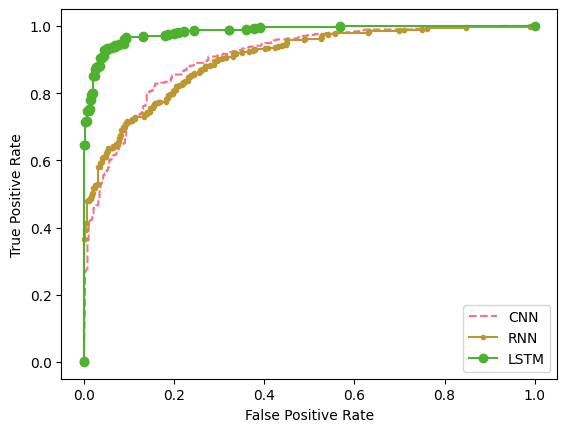

In [137]:
from tkinter.constants import Y
import matplotlib.pyplot as plt
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# take predicted probabilities from previous cell
cnn_probs = cnn_predictions_prob
rnn_probs = rnn_predictions_prob
lstm_probs = lstm_predictions_prob

# calculate scores
cnn_auc = roc_auc_score(y_val, cnn_probs)
rnn_auc = roc_auc_score(y_val, rnn_probs)
lstm_auc = roc_auc_score(y_val, lstm_probs)

# summarize scores
print('CNN: ROC AUC=%.3f' % (cnn_auc))
print('RNN: ROC AUC=%.3f' % (rnn_auc))
print('LSTM: ROC AUC=%.3f' % (lstm_auc))

# calculate roc curves
cnn_fpr, cnn_tpr, _ = roc_curve(y_val, cnn_probs)
rnn_fpr, rnn_tpr, _ = roc_curve(y_val, rnn_probs)
lstm_fpr, lstm_tpr, _ = roc_curve(y_val, lstm_probs)

# plot the roc curve for the models
plt.plot(cnn_fpr, cnn_tpr, linestyle='--', label='CNN')
plt.plot(rnn_fpr, rnn_tpr, marker='.', label='RNN')
plt.plot(lstm_fpr, lstm_tpr, marker='o', label='LSTM')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Comparison Analysis:

* Both CNN and RNN had faster training times, however RNN struggled a bit more with accuracy.
* LSTM was slower than both of the other models, but had more consistent results.

# **7. Model Saving for Streamlit Deployment**

In [138]:
#Save Models for Streamlit Deployment

print("Saving models for Streamlit deployment...")

# Save the CNN model
cnn_filename = 'CNN.pkl'
joblib.dump(cnn_model, cnn_filename)

# Save the RNN model
rnn_filename = 'RNN.pkl'
joblib.dump(rnn_model, rnn_filename)

# Save the LSTM model
lstm_filename = 'LSTM.pkl'
joblib.dump(lstm_model, lstm_filename)

print("Models saved successfully!")
print(f"CNN model: {cnn_filename}")
print(f"RNN model: {rnn_filename}")
print(f"LSTM model: {lstm_filename}")

Saving models for Streamlit deployment...
Models saved successfully!
CNN model: CNN.pkl
RNN model: RNN.pkl
LSTM model: LSTM.pkl
